In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn                   
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('train.csv')

In [3]:
df2.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
df2.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [6]:
df1.shape, df2.shape

((13564, 17), (31647, 18))

<AxesSubplot:>

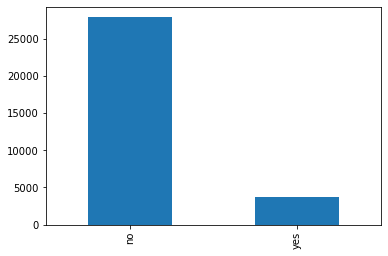

In [8]:
df2['subscribed'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

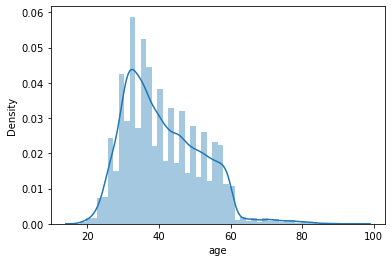

In [9]:
sn.distplot(df2["age"])

<AxesSubplot:>

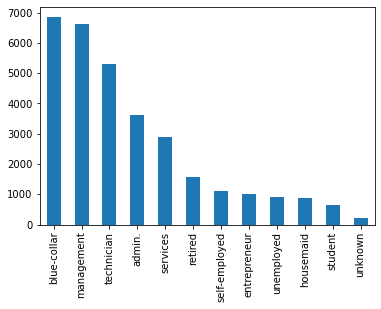

In [11]:
df2['job'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

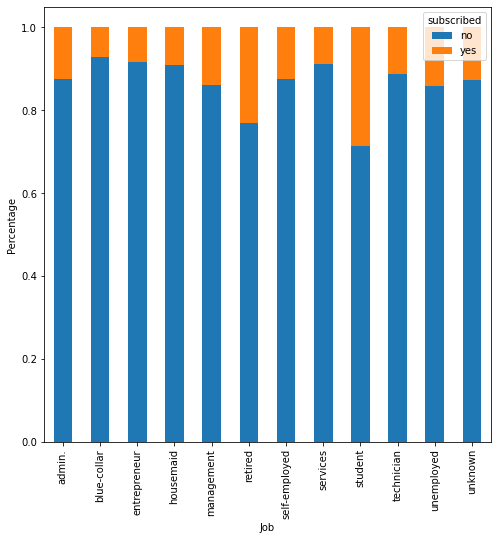

In [12]:
print(pd.crosstab(df2['job'],df2['subscribed']))

job=pd.crosstab(df2['job'],df2['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

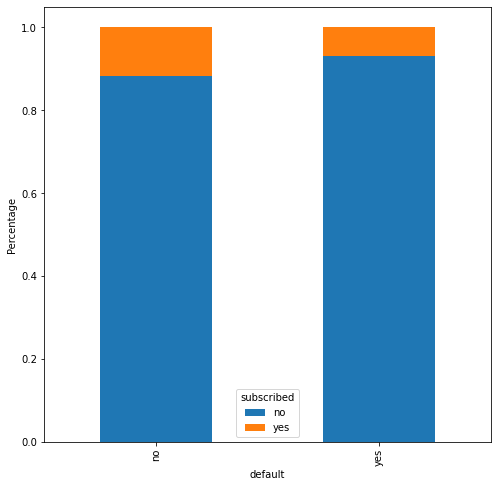

In [13]:
print(pd.crosstab(df2['default'],df2['subscribed']))

default=pd.crosstab(df2['default'],df2['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [10]:
df3 = df2.copy()
df4 = df2.copy()
df4['subscribed'].replace('yes',1,inplace=True)
df4['subscribed'].replace('no',0,inplace=True)

<AxesSubplot:>

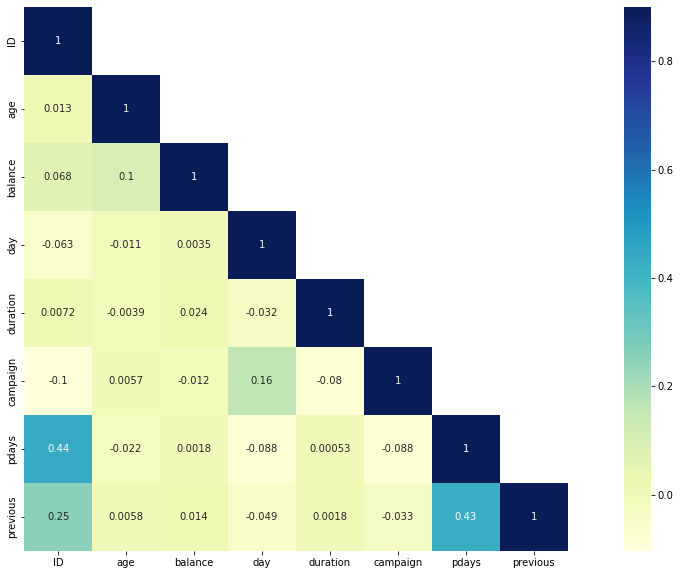

In [14]:
corr = df2.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [15]:
df2.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [26]:
target = df4['subscribed']
train = df4.drop('subscribed',1)
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure


In [27]:
df4

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


In [28]:
train = pd.get_dummies(train)
train

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,40178,53,380,5,438,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31644,19710,32,312,7,37,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,38556,57,225,15,22,7,337,12,0,0,...,0,0,1,0,0,0,1,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, y_train,X_test, y_test = train_test_split(train,target,test_size=0.2,random_state=12)

In [31]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,X_test)
lreg.score(y_train,y_test)

0.8906793048973144

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,X_test)
clf.score(y_train,y_test)

0.8824644549763033

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,X_test)
rfc.score(y_train,y_test)

0.906003159557662

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,X_test)
GBC.score(y_train,y_test)

0.9085308056872038

In [35]:
df5 = df1.copy()

In [36]:
df5.shape

(13564, 17)

In [37]:
df5 = pd.get_dummies(df5)

In [39]:
test_prediction = clf.predict(df5)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [40]:
submission = pd.DataFrame()

In [41]:
submission['subscribed'] = test_prediction

In [44]:
df6 = df5.copy()

In [51]:
submission['ID'] = df6['ID']
df7 = pd.concat([df6,submission])

In [55]:
df8 = df6.copy()

In [57]:
df8['subscribed'] = submission['subscribed']

In [59]:
submission.to_csv('submission.csv', header=True, index=False)